# <span id="toc">  Esercitazione 6 - Modello di Ising </span>

[  Modello di Ising ](#ex-6.0)

[  6.1 - Energia interna ](#ex-6.1)

[  6.2 - Capacità termica ](#ex-6.2)

[  6.3 - Magnetizzazione ](#ex-6.3)

[  6.4 - Suscettività magnetica ](#ex-6.4)




## <span id="ex-6.0">  Modello di Ising </span>[^](#toc)

Storicamente il modello di Ising è stato introdotto per descrivere il ferromagnetismo.
Esso rappresenta un **sistema di spin** posizionati ai nodi di un reticolo N-dimensionale, i quali possono assumere valori discreti $\pm 1$. Gli spin interagiscono tra loro in genere limitatamente ai primi vicini. Un sistema di questo tipo è **magnetizzato** quando gli spin sono allineati, altrimenti non lo è, quando le **fluttuazioni termiche** prevalgono sull'interazione a coppie.

L'**energia** di un sistema di Ising dipende quindi dall'orientazione di ciascuno spin: quando uno di questi viene ribaltato, l'energia del sistema cambia, dipendentemente dall'orientazione degli spin adiacenti. La **probabilità** che il sistema si trovi in un determinato stato energetico dipende dall'energia (ad esempio secondo il peso di Boltzmann, in questa esercitazione), quindi è possibile implementare **algoritmi che esplorano lo spazio delle fasi** "guidati" dalla ricerca di configurazioni più probabili.

In particolare, l'energia del sistema è definita dall'Hamiltoniana

$$
H = 
    -J\sum_{i=1}^N s_i s_{i+1}
    -h\sum_{i=1}^N s_i
$$
dove il primo termine rappresenta il contributo delle interazioni tra spin primi vicini (con costante di interazione $J$) e il secondo quello dell'interazione di ciascuno spin con il campo esterno $h$.

Per questa esercitazione ci è stato fornito un codice che simula un sistema di spin definito da un modello di Ising 1D, a temperatura $T$ fissata e costante, tramite due possibili algoritmi di campionamento del peso di Boltzmann $p(\{ s_i \}) = \exp(-\frac{1}{k_B T} H)/Z = \exp(-\beta H)/Z$:
- campionamento di ***Metropolis*** 
- campionamento di ***Gibbs***

Gli algoritmi di campionamento determinano **in che modo** lo spazio delle configurazioni viene visitato, siccome riguardano il meccanismo con cui ogni passo (*spin flip*) viene eseguito e accettato.  
Il vincolo di temperatura costante equivale a dire che stiamo lavorando con un **ensemble canonico**: dal punto di vista macroscopico il sistema si mantiene alla temperatura data grazie allo **scambio di energia** con un bagno termico di capacità termica $>>$ di quella del sistema.

Il codice fornitoci è già in grado di calcolare l'energia interna per spin $U(N,T) = \langle H \rangle$. Il compito richiesto è di aggiungere il calcolo di **capacità termica** $C(N,T)$, **suscettività magnetica** $\chi(N,T)$, **magnetizzazione** $M(N,T,h)$ (per spin) e calcolarle nelle seguenti condizioni:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

in funzione di $T$ nell'intervallo $\left[0.5;2.0\right]$ per un sistema di $N=50$ spin con costante di interazione a coppie $J=1$. Si noti che la soluzione analitica del modello di Ising 1D esiste (anche con campo esterno non nullo) e ci permette di verificare la validità delle nostre stime.  
Spinto dalla curiosità, durante l'esercitazione ho provato ad eseguire le mie stime poco oltre i limiti suggeriti, e siccome i risultati si sono rivelati in accordo con la teoria, ho scelto di mantenerli: l'intervallo che ho utilizzato è quindi $T\in [0.1, 3]$. Ho voluto aggiungere anche una seconda curva della magnetizzazione in campo esterno $h=0.2$.

Come al solito, i risultati sono calcolati e graficati col metodo del data blocking.

### Metropolis sampling

L'algoritmo di Metropolis in questo problema funziona nel seguente modo:
- prende una configurazione $a := \{s_1, ..., s_n\}$
- modifica l'orienzazione di *uno spin* estratto a caso, ad esempio l'i-esimo, portandosi in $b := \{s_1, ..., -s_i, ..., s_n\}$
- accetta la mossa proposta con probabilità $A(b|a) = \min \left[1, e^{-\beta(\Delta E)}\right]$, quindi accetta il $100\%$ delle mosse in direzione di configurazioni più probabili, mentre rigetta una parte delle mosse proposte in direzione di configurazioni meno probabili

### Gibbs sampling

L'algoritmo di Gibbs funziona invece così:
- prende una configurazione $a := \{s_1, ..., s_n\}$
- calcola la probabilità associata a un *nuovo stato casuale* (indipendente da quello precedente) dell'*i-esimo spin* estratto a caso: $p(s_i\rightarrow -s_i) = \frac{1}{1+exp(-\beta \Delta E)}$;
- **impone** il nuovo con la probabilità calcolata, altrimenti il suo opposto

Per il fatto di *imporre* il flip, l'algoritmo di Gibbs è più efficiente, siccome non rigetta alcun tentativo.

### Note sul codice

Ogni step Monte Carlo consiste nel provare a modificare la configurazione ciclando su tutti gli spin e provando a ribaltarli uno per uno.
Per ogni spin flip non è stato necessario ricalcolare tutta l'hamiltoniana, perché vengono modificate solo 3 interazioni: 2 con i primi vicini e una con l'eventuale campo esterno.

Siccome era farraginoso fare ogni volta le simulazioni a mano per ciascuna temperatura, ho creato un semplice bash script che modifica la linea del file `input.dat` relativa alla temperatura ed esegue in automatico (per 9 diverse temperature: 0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3).

Si chiama `run_all_temp.sh`.

Per riempire tutti i file relativi alla simulazione è necessario eseguire lo script:
- ad $h=0$
- ad $h=0.02$
- ad $h=0.2$

con algoritmo di Metropolis e di Gibbs, quindi in totale 6 volte (modificando di volta in volta il file `input.dat`). Nota: quando $h\neq 0$ i file per i plot di energia, suscettività e capacità termica non vengono scritti; viceversa, quando $h=0$, non vengono scritti solo quelli della magnetizzazione.

Automatizzare i processi è molto divertente.


## Equilibrazione

Durante l'inizializzazione (chiamata alla funzione `Input()`) viene generata una configurazione degli spin completamente casuale, corrispondente alla condizione $T=+\infty$. 

La funzione `Move()` modifica le configurazione dipendentemente dalla temperatura, attraverso il parametro `beta`, quindi mi aspetto che dopo un certo numero di chiamate ad essa il sistema raggiunga una condizione stazionaria che rispecchia la temperatura impostata da input.

Ho graficato l'andamento di energia intena e magnetizzazione, in funzione del numero di step (ad ogni step corrisponde una chiamata a `Move()`), date diverse temperature, per dedurre il numero di step necessari a equilibrare il sistema, usando entrambi gli algoritmi. Per farlo ho usato $1000$ blocchi da $1$ passo. Dove non specificato, il campo esterno è nullo.

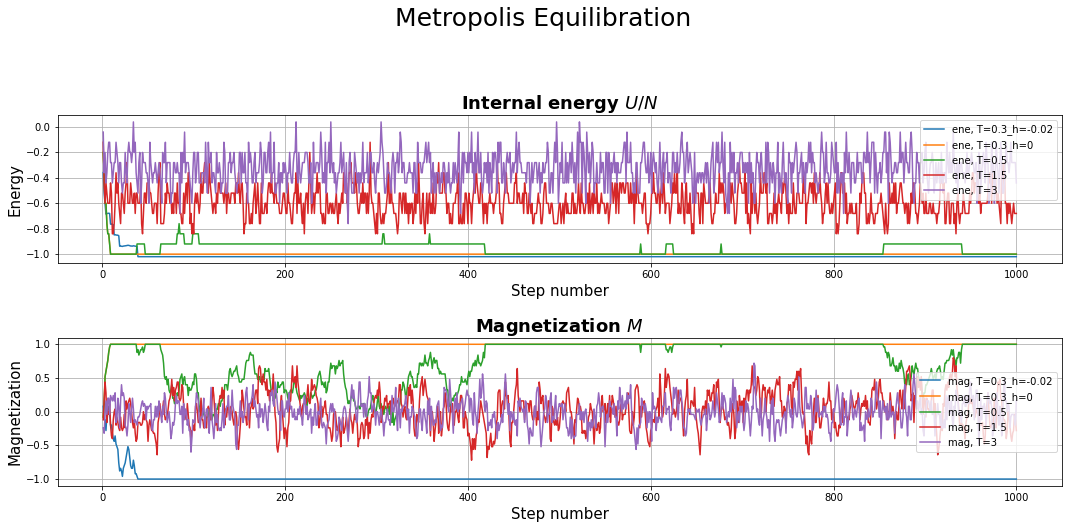

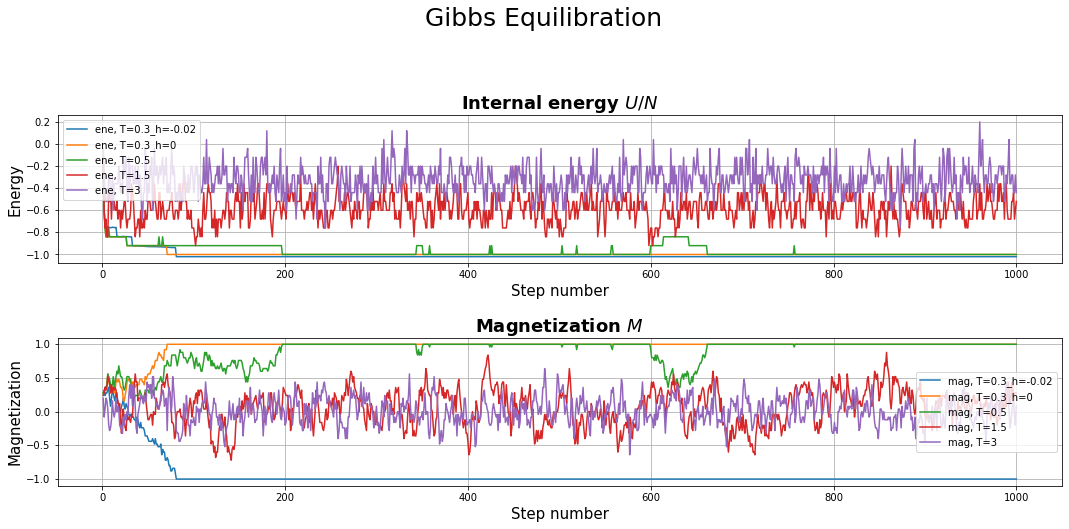

In [102]:
# equilibrazione

# uso 1'000 blocchi da 1 passo

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.arange(N)+1    # uso l'ordinamento da 1 a N

labels = ["ene", "mag"]
ylabels = ["Energy", "Magnetization"]
titles = ["Internal energy $U/N$", "Magnetization $M$"]
temp = ["0.3_h=-0.02", "0.3_h=0", "0.5", "1.5", "3"]
algor = ["M", "G"]

for alg in algor:
    plt.figure(figsize=(18,15))
    if alg=="M": plt.suptitle("Metropolis Equilibration", fontsize = 25)
    if alg=="G": plt.suptitle("Gibbs Equilibration", fontsize = 25)

    for i in range(0,2):
        plt.subplot(4,1,i+1)
        for j in range(0,5):
            ave, ave_prog, err = np.loadtxt("Ising_1D/eq/"+alg+"/"+temp[j]+"/output."+labels[i]+".0", usecols=(1,2,3), delimiter=' ', unpack='true')
            plt.plot(x, ave, marker=None, label=labels[i]+", T="+temp[j])
        plt.title(titles[i], fontsize = 18, fontweight = "bold")
        plt.ylabel(ylabels[i], fontsize = 15)
        plt.xlabel('Step number', fontsize = 15)
        plt.grid(True)
        plt.legend()
        plt.subplots_adjust(hspace=0.5)


    plt.show()

### Osservazioni

A $T=0.5$ il sistema è un po' instabile, come si vede ad esempio dalla fluttuazione tra 600 e 700 step per Gibbs e intorno a 900 per Metropolis: mi aspetto che intorno a questa temperatura si possa trovare ad esempio una transizione di fase!

Osservo che la magnetizzazione "cade" in +1 se siamo al di sotto della temperatura di transizione: in effetti la configurazione di partenza mostra una magnetizzazione iniziale casualmente diversa da zero; mi aspetto che modificando i *seed* del GNC questa sia a volte positiva, a volte negativa.

Ho provato inoltre a forzare il sistema verso magnetizzazione negativa ponendo $h=-0.02$ e in effetti così assume magnetizzazione $M=_1$. L'energia viene leggermente ridotta dalla presenza del campo esterno, coerentemente con la teoria.

A temperature maggiori la magnetizzazione oscilla attorno a $0$, e l'energia aumenta, come ci aspettavamo.

In generale, comunque, possiamo tranquillamente assumere che entro i 1000 passi il sistema sia equilibrato.

### Restart option

Ho implementato la funzione restart (e funziona), ma avendo osservato che il sistema si porta all'equilibrio in meno di 1000 passi, ho ritenuto più efficiente aggiungere all'inizio di ogni simulazione un ciclo di 2000 passi (per stare largo!) in cui il sistema viene lasciato evolvere prima di inizare la simulazione vera e propria.

Qui sotto ad esempio ho plottato le energie nei primi $1000$ step (campionamento alla Gibbs, con h=0, T = 0.3) nei tre casi:
1. nessun tipo di equilibrazione
2. equilibrazione da restart (prende in ingresso la configurazione uscita dal caso 1)
3. equilibrazione da evoluzione autonoma per 2000 passi

Questo sistema è certamente meno rigoroso e non permette una affidabilità universale, ma come mostrato durante lo studio dell'equilibrazione, dovrebbe essere comunque efficace per le simulazioni svolte in questa esercitazione.

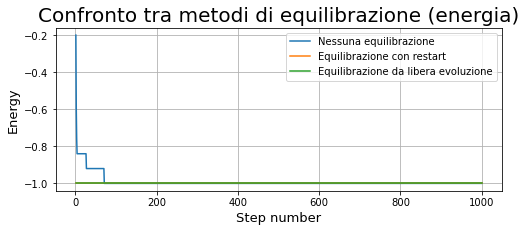

In [96]:
# uso gibbs sampling

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.arange(N)+1    # uso l'ordinamento da 1 a N

plt.figure(figsize=(8,3))

ave, ave_prog, err = np.loadtxt("Ising_1D/restart_esempio/output.ene_neq.0", usecols=(1,2,3), delimiter=' ', unpack='true')
plt.plot(x, ave, marker=None, label="Nessuna equilibrazione")
ave, ave_prog, err = np.loadtxt("Ising_1D/restart_esempio/output.ene_rs.0", usecols=(1,2,3), delimiter=' ', unpack='true')
plt.plot(x, ave, marker=None, label="Equilibrazione con restart")
ave, ave_prog, err = np.loadtxt("Ising_1D/restart_esempio/output.ene_eq.0", usecols=(1,2,3), delimiter=' ', unpack='true')
plt.plot(x, ave, marker=None, label="Equilibrazione da libera evoluzione")
plt.title('Confronto tra metodi di equilibrazione (energia)', fontsize = 20)
plt.ylabel('Energy', fontsize = 13)
plt.xlabel('Step number', fontsize = 13)
plt.grid(True)
plt.legend()

plt.show()

## <span id="ex-6.1">  Esercizio 6.1 - Energia interna </span>[^](#toc)

Per questa e le successive stime ho usato $20$ blocchi da $10^5$ step ciascuno.  
Quando non specificato, il campo esterno è nullo.

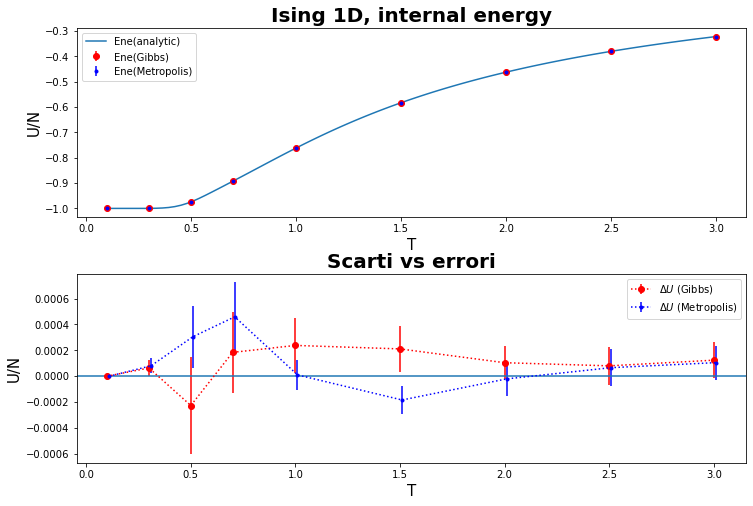

In [126]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

points=100
T = np.linspace(0.1,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
plt.plot(T, e, label="Ene(analytic)")
plt.title('Ising 1D, internal energy', fontsize = 20, fontweight = "bold")
plt.ylabel('U/N',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
temp, ave_fin, err = np.loadtxt("Ising_1D/plot_gibbs/ene.0", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(temp, ave_fin, yerr = err, marker='o', linestyle="none", label="Ene(Gibbs)", color = "r")
temp, ave_fin_m, err_m = np.loadtxt("Ising_1D/plot_metro/ene.0", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(temp, ave_fin_m, yerr = err_m, marker='.', linestyle="none", label="Ene(Metropolis)", color = "b")
plt.legend()

#----------------------

th_d = np.tanh(J/temp)
thN_d= th_d**Ns
ch_d = 1/th_d
e_d = -J*( th_d + ch_d*thN_d )/( 1 + thN_d )

plt.subplot(2,1,2)
plt.errorbar(temp, ave_fin-e_d, yerr = err, marker='o', linestyle = "dotted", label="$\Delta U$ (Gibbs)", color = "r")
plt.errorbar(temp+0.01, ave_fin_m-e_d, yerr = err_m, marker='.', linestyle = "dotted", label="$\Delta U$ (Metropolis)", color = "b") # +0.01 per vedere sotto
plt.title("Scarti vs errori", fontsize = 20, fontweight = "bold")
plt.ylabel('U/N',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
plt.legend()
plt.axhline(y=0)
plt.subplots_adjust(hspace=0.3)

plt.show()

Si nota che nella zona di transizione (tra $T=0.5$ e $1.5$) gli scarti dalla previsione teorica sono maggiori, ma anche gli errori, quindi la compatibilità resta accettabile. Si potrebbe comunque aumentare il numero di step per migliorare ulteriormente le stime.

A bassissime temperature la stima risulta priva d'errore (e corretta) probabilmente perché gli spin sono sempre allineati e il sistema non visita alcuna altra configurazione.

## <span id="ex-6.2">  Esercizio 6.2  Capacità termica </span>[^](#toc)

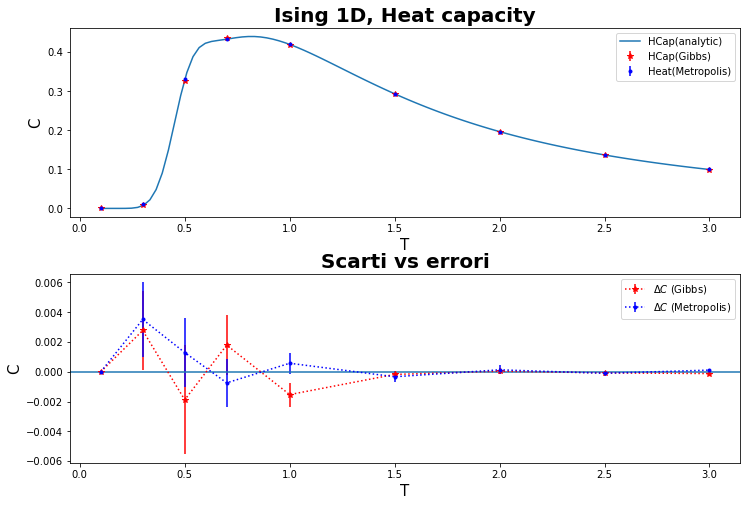

In [127]:
# il risultato di questa stima era particolarmente brutto.
# Ho provato a utilizzare restart e a decuplicare il numero di passi,
# arrivando a un totale di 2*10^6 ...
# ... ma in tutti i casi non si sono viste differenze significative.

# alla fine il problema era nell'implementazione dell'accumulo :(

plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label = "HCap(analytic)")
plt.title('Ising 1D, Heat capacity', fontsize = 20, fontweight = "bold")
plt.xlabel('T',  fontsize = 15)
plt.ylabel('C',  fontsize = 15)
temp, ave_fin, err = np.loadtxt("Ising_1D/plot_gibbs/heat.0", usecols=(0,1,2), delimiter=' ', unpack='true') 
plt.errorbar(temp, ave_fin, yerr = err, marker='*', linestyle="none", label="HCap(Gibbs)", color = "r")
temp, ave_fin_m, err_m = np.loadtxt("Ising_1D/plot_metro/heat.0", usecols=(0,1,2), delimiter=' ', unpack='true') 
plt.errorbar(temp, ave_fin_m, yerr = err_m, marker='.', linestyle="none", label="Heat(Metropolis)", color = "b")
plt.legend()

# ========== errors ==============

th_d = np.tanh(J/temp)
thN_d= th_d**Ns
ch_d = 1/th_d
heat_d=((1/temp*J)**2)*(((1+thN_d+(Ns-1)*(th_d**2)+(Ns-1)*(ch_d**2)*thN_d)/(1+thN_d))-Ns*((th_d+ch_d*thN_d)/(1+thN_d))**2)

plt.subplot(2,1,2)
plt.errorbar(temp, ave_fin-heat_d, yerr = err, marker='*', linestyle = "dotted", label="$\Delta C$ (Gibbs)", color = "r") 
plt.errorbar(temp, ave_fin_m-heat_d, yerr = err_m, marker='.', linestyle = "dotted", label="$\Delta C$ (Metropolis)", color = "b")
plt.title("Scarti vs errori", fontsize = 20, fontweight = "bold")
plt.xlabel('T',  fontsize = 15)
plt.ylabel('C',  fontsize = 15)
plt.axhline(y=0)
plt.legend()

plt.subplots_adjust(hspace=0.3)

plt.show()



Anche in questo caso si osserva che nella zona di transizione (tra $T=0.5$ e $1.5$) gli scarti dalla previsione teorica sono maggiori, ma anche gli errori, quindi la compatibilità resta accettabile.

## <span id="ex-6.3">  Esercizio 6.3 - Magnetizzazione </span>[^](#toc)

In questo caso ho imposto $h=0.2$ e $h=0.02$ e ripetuto le stime sullo stesso set di temperature di prima.

Per chiarezza, il confrontro tra gli scarti dal valore teorico e gli errori è mostrato solo per il caso $h=0.02$.

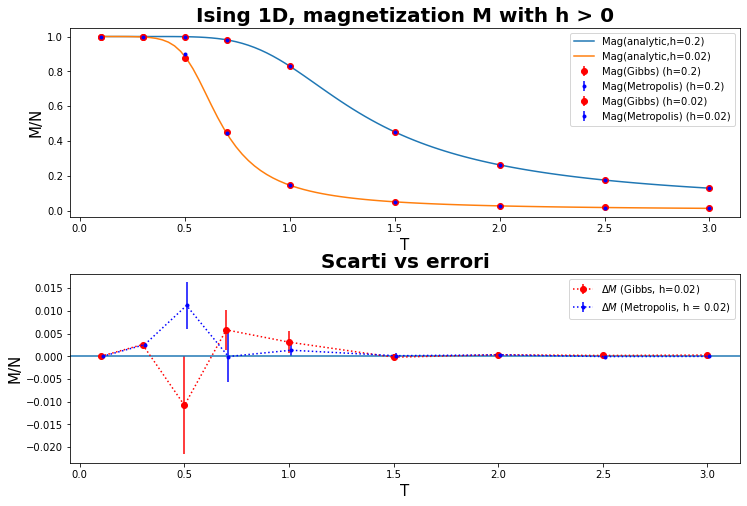

In [128]:
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)

# =========== h=0.2 ===============

h=0.2 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, label = "Mag(analytic,h=0.2)")
temp, ave_fin1, err = np.loadtxt("Ising_1D/plot_gibbs/mag.0.20", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(temp, ave_fin1, yerr = err, marker='o', linestyle="none", label="Mag(Gibbs) (h=0.2)", color = "r")
temp, ave_fin1, err = np.loadtxt("Ising_1D/plot_metro/mag.0.20", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(temp, ave_fin1, yerr = err, marker='.', linestyle="none", label="Mag(Metropolis) (h=0.2)", color = "b")

# =========== h=0.02 ===============

h=0.02 #external field

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, label = "Mag(analytic,h=0.02)")
plt.title('Ising 1D, magnetization M with h > 0', fontsize = 20, fontweight = "bold")
plt.ylabel('M/N',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
temp, ave_fin, err = np.loadtxt("Ising_1D/plot_gibbs/mag.0.02", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(temp, ave_fin, yerr = err, marker='o', linestyle="none", label="Mag(Gibbs) (h=0.02)", color = "r")
temp, ave_fin_m, err_m = np.loadtxt("Ising_1D/plot_metro/mag.0.02", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(temp, ave_fin_m, yerr = err_m, marker='.', linestyle="none", label="Mag(Metropolis) (h=0.02)", color = "b")
plt.legend()

# =========== errors (h=0.02) ==============

plt.subplot(2,1,2)

th_d = np.tanh(J/temp)
thN_d= th_d**Ns
ch_d = 1/th_d
h=0.02 
b = 1/temp
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M_d = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.errorbar(temp, ave_fin-M_d, yerr = err, marker='o', linestyle = "dotted", label="$\Delta M$ (Gibbs, h=0.02)", color = "r")
plt.errorbar(temp+0.01, ave_fin_m-M_d, yerr = err_m, marker='.', linestyle = "dotted", label="$\Delta M$ (Metropolis, h = 0.02)", color = "b") # +0.01 per vedere sotto
plt.title("Scarti vs errori", fontsize = 20, fontweight = "bold")
plt.ylabel('M/N',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
plt.axhline(y=0)
plt.legend()

plt.subplots_adjust(hspace=0.3)

plt.show()

## <span id="ex-6.4">  Esercizio 6.4 - Suscettività magnetica </span>[^](#toc)


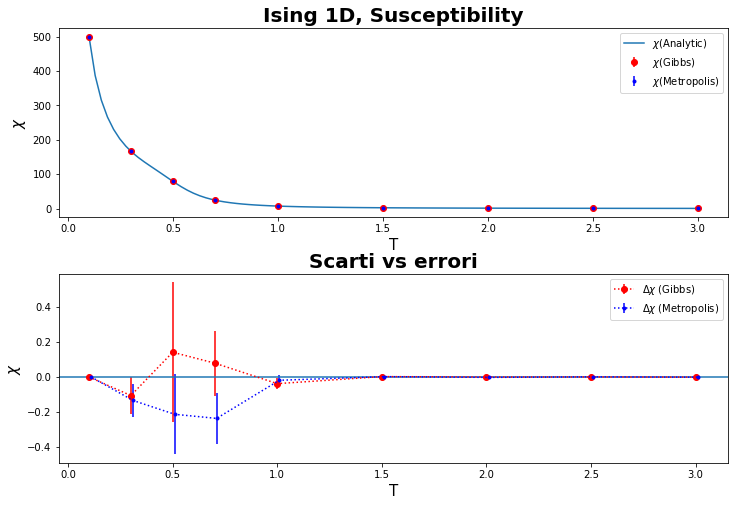

In [124]:
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label = "$\chi$(Analytic)")
plt.title('Ising 1D, Susceptibility', fontsize = 20, fontweight = "bold")
plt.ylabel('$\chi$',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
temp, ave_fin, err = np.loadtxt("Ising_1D/plot_gibbs/chi.0", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(temp, ave_fin, yerr = err, marker='o', linestyle="none", label="$\chi$(Gibbs)", color = "r")
temp, ave_fin_m, err_m = np.loadtxt("Ising_1D/plot_metro/chi.0", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(temp, ave_fin_m, yerr = err_m, marker='.', linestyle="none", label="$\chi$(Metropolis)", color = "b")
plt.legend()

#----------ERRORI------------

plt.subplot(2,1,2)

th_d = np.tanh(J/temp)
thN_d= th_d**Ns
ch_d = 1/th_d
X_d = (1/temp)*np.exp(2*(1/temp)*J)*(1-thN_d)/(1+thN_d)

plt.errorbar(temp, ave_fin-X_d, yerr = err, marker='o', linestyle = "dotted", label="$\Delta\chi$ (Gibbs)", color = "r")
plt.errorbar(temp+0.01, ave_fin_m-X_d, yerr = err_m, marker='.', linestyle = "dotted", label="$\Delta\chi$ (Metropolis)", color = "b") # +0.01 per vedere sotto
plt.title("Scarti vs errori", fontsize = 20, fontweight = "bold")
plt.ylabel('$\chi$',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
plt.legend()
plt.axhline(y=0)

plt.subplots_adjust(hspace=0.3)

plt.show()




### Conclusioni

In tutti e quattro i casi, osservo buona compatibilità tra le misure e le previsioni teoriche. Questo suggerisce che anche a temperature basse, dove l'ergodicità del Metropolis non è ottima, il numero di step scelto è sufficientemente grande da coprire bene lo spazio delle configurazioni.